In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import math
import time
import hashlib
import hmac
import requests
import json
import csv
import os
from tqdm import tqdm
import requests

In [ ]:
# import os

# base_dir = "/data/market_maker/Gate_io/Data/"
# # 获取目录下所有的文件名，并排除含有 '_USDT' 的文件
# file_names = [f for f in os.listdir(base_dir) 
#               if os.path.isfile(os.path.join(base_dir, f)) ]

# new_file_names = [name.replace("_USDT.csv", "") for name in file_names]

# ticker_pool = new_file_names
# ticker_pool = ['MELANIA']


def gen_sign(method, url, query_string=None, payload_string=None):
    key = ""
    secret = ""

    t = time.time()
    m = hashlib.sha512()
    m.update((payload_string or "").encode('utf-8'))
    hashed_payload = m.hexdigest()
    s = '%s\n%s\n%s\n%s\n%s' % (method, url, query_string or "", hashed_payload, t)
    sign = hmac.new(secret.encode('utf-8'), s.encode('utf-8'), hashlib.sha512).hexdigest()
    return {'KEY': key, 'Timestamp': str(t), 'SIGN': sign}

host = "https://api.gateio.ws"
prefix = "/api/v4"
headers = {'Accept': 'application/json', 'Content-Type': 'application/json'}

url = '/unified/borrowable'

base_dir = "/data/market_maker/Gate_io/Data/"
if not os.path.exists(base_dir):
    os.makedirs(base_dir)


for ticker in ['SUPRA']:
    query_param = f'currency={ticker}'
                
    sign_headers = gen_sign('GET', prefix + url, query_param)
    headers.update(sign_headers)
    r = requests.get(host + prefix + url + "?" + query_param, headers=headers)
    result = r.json()
    if 'currency' in result:
        currency = result['currency']
        amount = result['amount']

amount

'264480.296217'

100%|██████████| 1/1 [00:00<00:00, 714.05it/s]


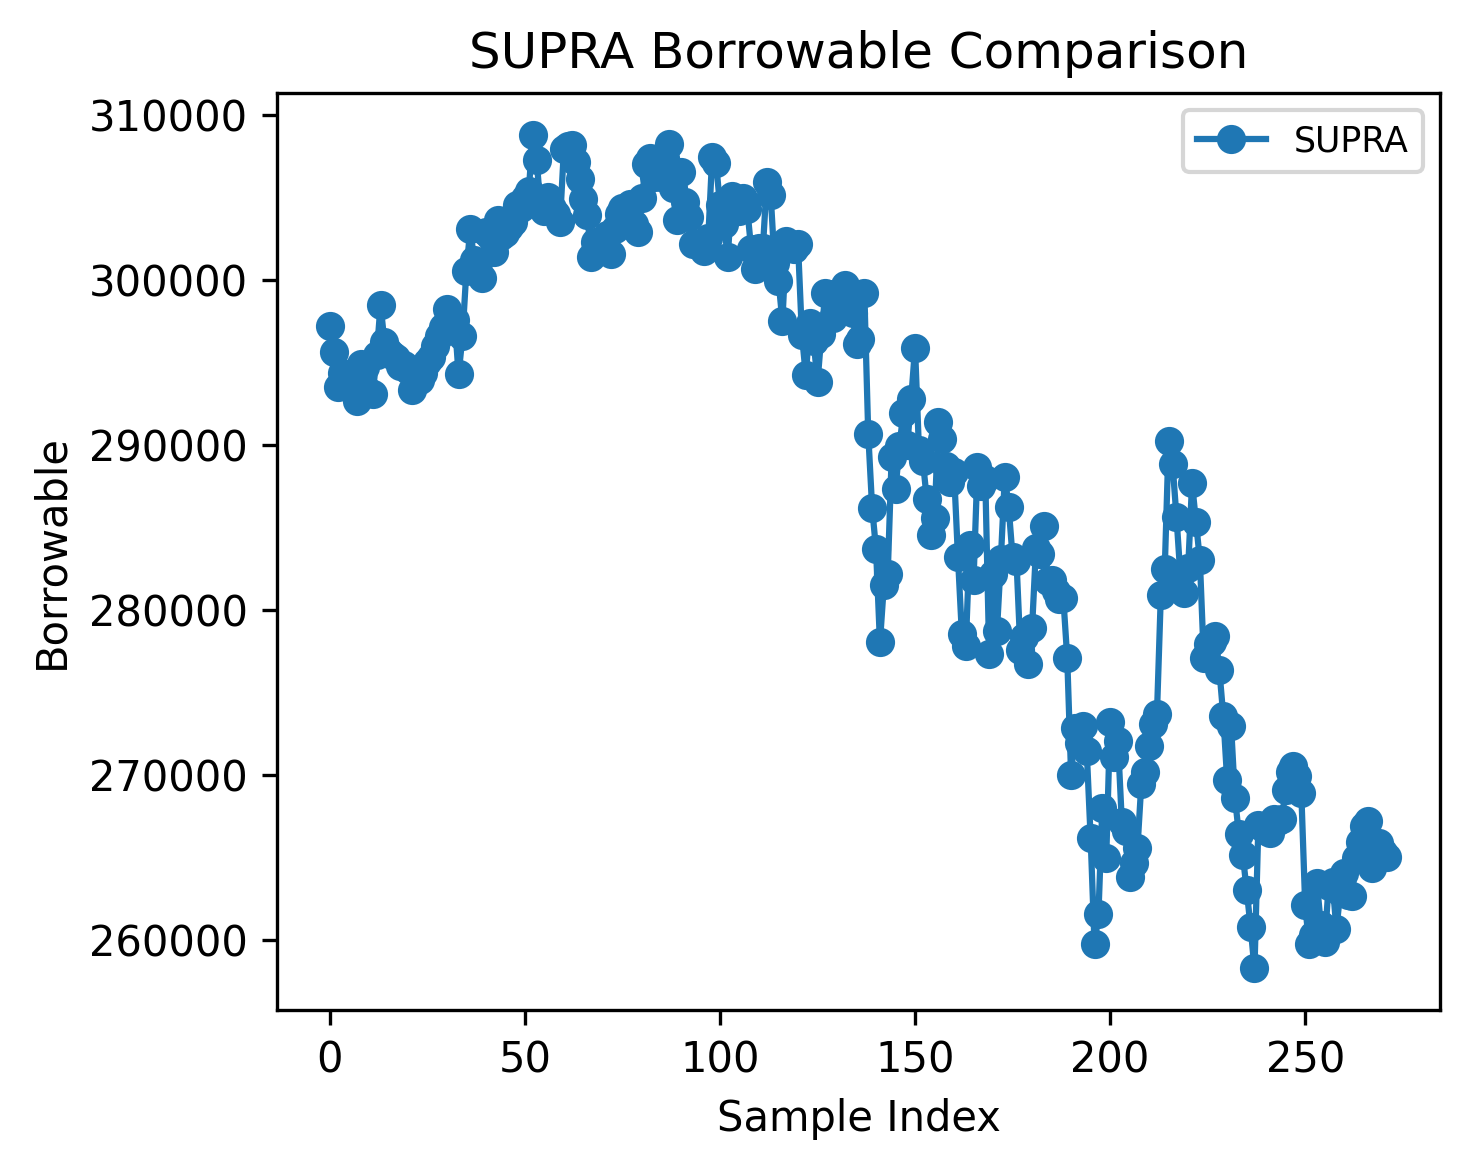

In [24]:
ticker_pool = ['SUPRA']


valid_data = []
for symbol in tqdm(ticker_pool):
    file_name = f"{symbol}_USDT.csv"
    file_path = f'/data/market_maker/Gate_io/Data/{file_name}'
    
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"读取 {file_name} 失败：{e}
    if 'Borrowable' not in df.columns:
        print(f"{file_name} 中未找到 'Borrowable' 列")
        continue
    
    # 取前 18 个数据点（如有需要，可以调整采样范围）
    sampled_borrowable = df['Borrowable']
    valid_data.append((symbol, sampled_borrowable))

if not valid_data:
    print("没有有效的数据进行绘图。")
else:
    for symbol, borrowable_series in valid_data:
        plt.figure(figsize=(5, 4), dpi=300)
        x_axis = range(len(borrowable_series))
        plt.plot(x_axis, borrowable_series, label=symbol, linestyle='-', marker='o')
        plt.title(f"{symbol} Borrowable Comparison")
        plt.xlabel("Sample Index")
        plt.ylabel("Borrowable")
        plt.legend(fontsize='small')
        plt.tight_layout()
        plt.show()
